# Lab 02
###### 2025 July 31

## Task: 

Graph has:

* 8 major locations: A (Airport), B (Bus Terminal), C (Central Mall), D (Downtown), E (Electric Station), F (Food Court), G (Garden), H (Hospital).

* Roads connect these locations. Some roads are one-way (directed) and some are two-way (undirected).

* The city also runs delivery drones that can only move in one-way paths due to traffic regulations.

You are hired as a software engineer to model the city as a graph, and help answer some logistics and navigation questions.

Convert the following into a graph:

* Undirected roads (two-way):

  * A–B, A–C, B–D, D–E, E–F, F–G, G–H

* Directed roads (one-way, used by drones only):

  * C→D, D→F, F→H, H→C

Now solve the following questions : 

1. Visualize both graphs using `networkx.draw()`.
2. Find the shortest path between Airport (A) and Hospital (H) in the undirected graph.  
3. Check if the city (G_city) is connected.  
4. Find all locations reachable from Central Mall (C) by drone only.  
5. Detects a cycle in the drone delivery route graph.
6. Add weights (distances in km) to each edge.
7. Find the minimum distance path from Airport to Garden.
8. Find which location has the highest degree in the city road graph.
9. Convert the undirected graph into an adjacency matrix.
10. Find all nodes with even degree in the undirected graph.
11. Count the number of paths of length 2 from A to G.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
locations = ["A", "B", "C", "D", "E", "F", "G", "H"]

directed_edges = [
    ("C", "D"),
    ("D", "F"),
    ("F", "H"),
    ("H", "C"),
]

undirected_edges = [
    ("A", "B"),
    ("A", "C"),
    ("B", "D"),
    ("D", "E"),
    ("E", "F"),
    ("F", "G"),
    ("G", "H"),
]


# Init graphs
G_city = nx.Graph()
G_city.add_nodes_from(locations)
G_city.add_edges_from(undirected_edges)

G_drones = nx.DiGraph()
G_drones.add_nodes_from(locations)
G_drones.add_edges_from(directed_edges)

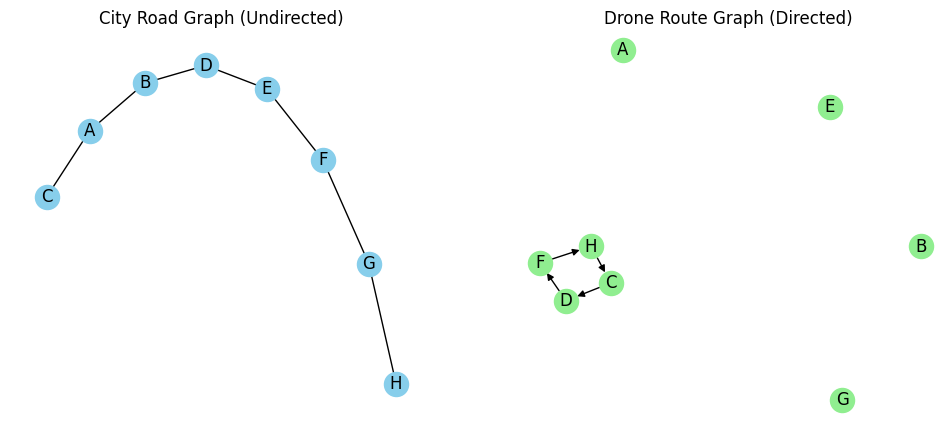

In [3]:
# 1. Visualize both graphs using `networkx.draw()`.

pos_city = nx.spring_layout(G_city, seed=42) # optional
pos_drones = nx.spring_layout(G_drones, seed=42) # optional

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.set_title("City Road Graph (Undirected)")
ax2.set_title("Drone Route Graph (Directed)")

nx.draw(
    G_city,
    pos_city,
    with_labels=True,
    node_color="skyblue",
    ax=ax1,
)

nx.draw(
    G_drones,
    pos_drones,
    with_labels=True,
    node_color="lightgreen",
    ax=ax2,
)

plt.show()

In [4]:
# 2. Find shortest path between Airport (A) and Hospital (H)


shortest_path = nx.shortest_path(G_city, "A", "H")
print(f"2. Shortest path from Airport to Hospital: {shortest_path}")

2. Shortest path from Airport to Hospital: ['A', 'B', 'D', 'E', 'F', 'G', 'H']


In [5]:
# 3. Check if the city graph is connected


is_connected = nx.is_connected(G_city)
print(f"3. City graph connected: {is_connected if "YES" else "NO"}")

3. City graph connected: True


In [6]:
# 4. Find all locations reachable from Central Mall (C) by drone only


reachable_nodes = nx.descendants(G_drones, "C")
print(f"4. Locations reachable from Central Mall by drone: {reachable_nodes}")

4. Locations reachable from Central Mall by drone: {'H', 'D', 'F'}


In [7]:
# 5. Detects a cycle in the drone delivery route graph.
    

try:
    cycle = nx.find_cycle(G_drones)
    print("5. Cycle found in drone graph:", cycle)
except nx.NetworkXNoCycle:
    print("5. No cycle found in drone graph")

5. Cycle found in drone graph: [('C', 'D'), ('D', 'F'), ('F', 'H'), ('H', 'C')]


In [8]:
# 6. Add weights (distances in km) to each edge.


from random import randint

# Add weights to G_city
for u, v in G_city.edges():
    G_city[u][v]['weight'] = randint(1,10) # optional: just to mimic real world scenario, you can use a const value

# N.B: `weight` is an attr of edge

# Add weights to G_drone
for u, v in G_drones.edges():
    G_drones[u][v]['weight'] = randint(1,10)

print("6. Weights added to G_city :", G_city.edges(data=True))
print("6. Weights added to G_drone:", G_drones.edges(data=True))

6. Weights added to G_city : [('A', 'B', {'weight': 3}), ('A', 'C', {'weight': 4}), ('B', 'D', {'weight': 4}), ('D', 'E', {'weight': 7}), ('E', 'F', {'weight': 1}), ('F', 'G', {'weight': 3}), ('G', 'H', {'weight': 4})]
6. Weights added to G_drone: [('C', 'D', {'weight': 2}), ('D', 'F', {'weight': 10}), ('F', 'H', {'weight': 7}), ('H', 'C', {'weight': 6})]


In [9]:
# 7. Find the minimum distance path from Airport to Garden


min_distance_path = nx.shortest_path(G_city, "A", "G", weight='weight')
print(f"7. Minimum distance path from Airport to Garden: {min_distance_path}")

7. Minimum distance path from Airport to Garden: ['A', 'B', 'D', 'E', 'F', 'G']


In [10]:
# 8. Find which location has the highest degree in the city road graph


degrees = G_city.degree()

max_degree = max(deg[1] for deg in degrees)
highest_degree_nodes = [node for node, deg in degrees if deg == max_degree]

print(f"8. Nodes with highest degree: {highest_degree_nodes} (highest degree: {max_degree})")

8. Nodes with highest degree: ['A', 'B', 'D', 'E', 'F', 'G'] (highest degree: 2)


In [11]:
# 9. Convert the undirected graph into an adjacency matrix

# N.B: Adjacency matrix: a square matrix used to represent a finite graph, elements indicate whether pairs of vertices are adjacent or not 

adj_matrix_sparse = nx.adjacency_matrix(G_city)
adj_matrix_dense = adj_matrix_sparse.toarray()

print(f"9.\n{adj_matrix_dense}")

9.
[[0 3 4 0 0 0 0 0]
 [3 0 0 4 0 0 0 0]
 [4 0 0 0 0 0 0 0]
 [0 4 0 0 7 0 0 0]
 [0 0 0 7 0 1 0 0]
 [0 0 0 0 1 0 3 0]
 [0 0 0 0 0 3 0 4]
 [0 0 0 0 0 0 4 0]]


In [12]:
# 10. Find all nodes with even degree in the undirected graph


even_degree_nodes = [node for node, deg in G_city.degree() if deg % 2 == 0]
print(f"10. Nodes with even degree: {even_degree_nodes}")

10. Nodes with even degree: ['A', 'B', 'D', 'E', 'F', 'G']


In [13]:
# 11. Count the number of paths of length 2 from A to G.


neighbors_A = set(G_city.neighbors('A'))

paths_length_2 = 0
for u in neighbors_A:
    if 'G' in G_city.neighbors(u):
        paths_length_2 +=1
        
# generators are confusing so I commented it. It does the same thing but in single line.
# paths_length_2 = sum(1 for u in neighbors_A if 'G' in G_city.neighbors(u))

print("11. Number of paths of length 2 from A to G:", paths_length_2)

11. Number of paths of length 2 from A to G: 0
